In [1]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns

In [177]:
covid_cases_by_day = pd.read_csv('cases-by-day.csv')
cases_by_boro = pd.read_csv("by-boro.csv")
rent_prices = pd.read_csv('medianAskingRent_All.csv')
rent_prices.rename(columns={"Attribute" : "Date", "Value" : "Median_Rent"}, inplace=True)
census_data = pd.read_csv('nyc_census_data.csv')

In [ ]:
##Graph to look at all covid cases in NYC since the start of Covid

dates_to_plot =covid_cases_by_day['date_of_interest']
covid_cases_to_plot = covid_cases_by_day['CASE_COUNT_7DAY_AVG']

sns.set(rc = {'figure.figsize':(15,8)})
sns.lineplot(dates_to_plot, covid_cases_to_plot)

In [ ]:
## Separate the data out by Borough 

boro_to_plot = covid_cases_by_day[["date_of_interest","BK_CASE_COUNT_7DAY_AVG","MN_CASE_COUNT_7DAY_AVG", 'QN_CASE_COUNT_7DAY_AVG',
'SI_CASE_COUNT_7DAY_AVG', 'BX_ALL_CASE_COUNT_7DAY_AVG' ]]
boro_to_plot.head()

#Melt the dataframe -- this is making the column headers of the different boroughs row values instead
boro_to_plot = boro_to_plot.melt('date_of_interest', var_name='Boroughs' , value_name='Covid Case Count 7 Day Avg')

##Graph the above values
sns.set(rc = {'figure.figsize':(15,8)})
g = sns.lineplot(x='date_of_interest', y='Covid Case Count 7 Day Avg', hue = 'Boroughs' , data = boro_to_plot)


C:\Users\jackc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Date', ylabel='Median_Rent'>

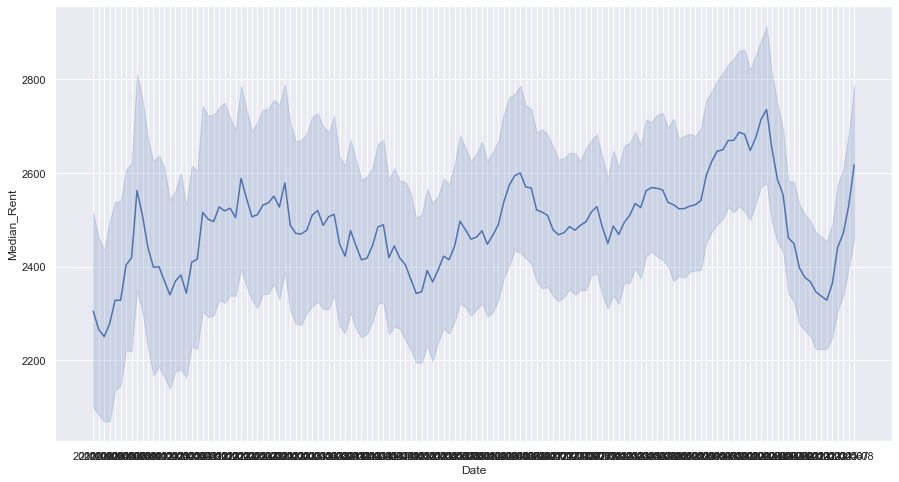

In [221]:
rent_prices.head()
sns.set(rc = {'figure.figsize':(15,8)})

rent_prices.groupby(['Date']).agg(np.average)
sns.lineplot(rent_prices['Date'], rent_prices['Median_Rent'])

In [146]:
rent_prices.head()

,areaName,Borough,areaType,Date,Median_Rent
0,All Downtown,Manhattan,submarket,2010-01,3200
1,All Downtown,Manhattan,submarket,2010-02,3200
2,All Downtown,Manhattan,submarket,2010-03,3025
3,All Downtown,Manhattan,submarket,2010-04,3100
4,All Downtown,Manhattan,submarket,2010-05,3100


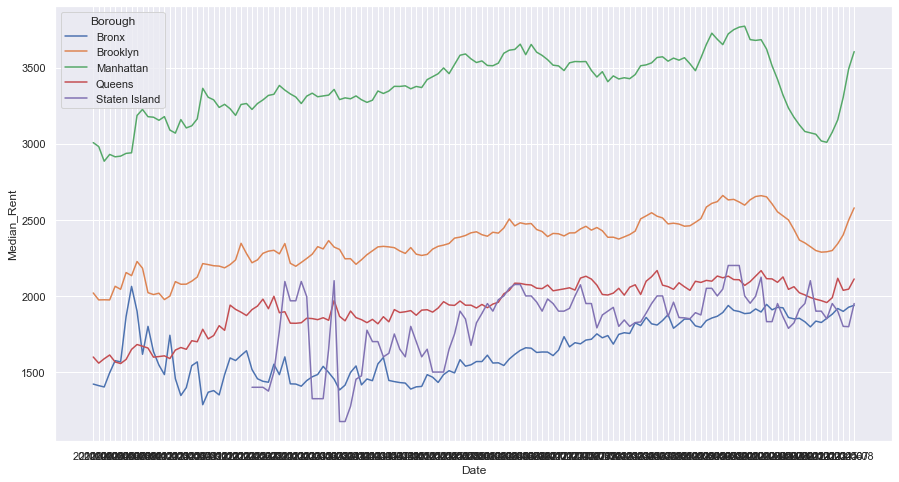

In [219]:
##Graph covid cases borough
median_rents_by_boro = rent_prices.groupby(['Date', 'Borough']).agg(np.average)

# sns.set(rc = {'figure.figsize':(15,8)})
# g = sns.lineplot(median_rents_by_boro['Date'] , median_rents_by_boro['Median_Rent'])
g = sns.lineplot(x='Date', y='Median_Rent', hue = 'Borough' , data = median_rents_by_boro)


In [151]:
## Create categories based on different timeframes of the Covid outbreak 

rent_prices.head()
rents_over_time = rent_prices[(rent_prices['Date'] == '2020-03') | (rent_prices['Date'] == '2020-01') | (rent_prices['Date'] == '2021-08') | (rent_prices['Date'] == '2021-01')]
rents_over_time.loc[rents_over_time['Date'] == '2020-01', 'covid_timeline'] = "Pre-Covid"
rents_over_time.loc[rents_over_time['Date'] == '2021-08', 'covid_timeline'] = "Current"
rents_over_time.loc[rents_over_time['Date'] == '2020-03', 'covid_timeline'] = "Covid Start"
rents_over_time.loc[rents_over_time['Date'] == '2021-01', 'covid_timeline'] = "Peak Covid"



C:\Users\jackc\anaconda3\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\jackc\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [152]:
rents_over_time.head()


rents_over_time.loc[rents_over_time['covid_timeline'] == 'Pre-Covid', 'sort'] = 0
rents_over_time.loc[rents_over_time['covid_timeline'] == 'Covid Start', 'sort'] = 1
rents_over_time.loc[rents_over_time['covid_timeline'] == 'Peak Covid', 'sort'] = 2
rents_over_time.loc[rents_over_time['covid_timeline'] == 'Current', 'sort'] = 3
rents_over_time = rents_over_time.groupby(["Borough" , "covid_timeline", 'sort']).agg(np.average)
rents_over_time = rents_over_time.sort_values(by = ["sort"]).reset_index()



rents_over_time

,Borough,covid_timeline,sort,Median_Rent
0,Staten Island,Pre-Covid,0.0,1952.000000
1,Queens,Pre-Covid,0.0,2093.882353
2,Bronx,Pre-Covid,0.0,1887.625000
3,Manhattan,Pre-Covid,0.0,3683.432432
4,Brooklyn,Pre-Covid,0.0,2631.326087
5,Staten Island,Covid Start,1.0,2123.000000
6,Queens,Covid Start,1.0,2166.133333
7,Manhattan,Covid Start,1.0,3683.135135
8,Bronx,Covid Start,1.0,1894.500000
9,Brooklyn,Covid Start,1.0,2658.500000


<AxesSubplot:xlabel='Borough', ylabel='Median_Rent'>

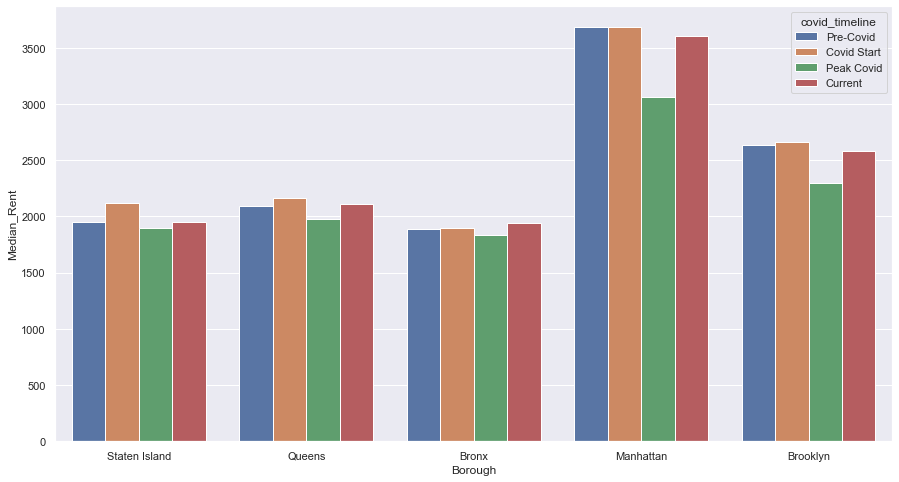

In [153]:
sns.barplot(
    x = 'Borough',
    y = "Median_Rent",
    hue='covid_timeline',
    data = rents_over_time
)

<AxesSubplot:xlabel='Borough', ylabel='Peak Covid Rents vs. Pre-Covid Rents (as %)'>

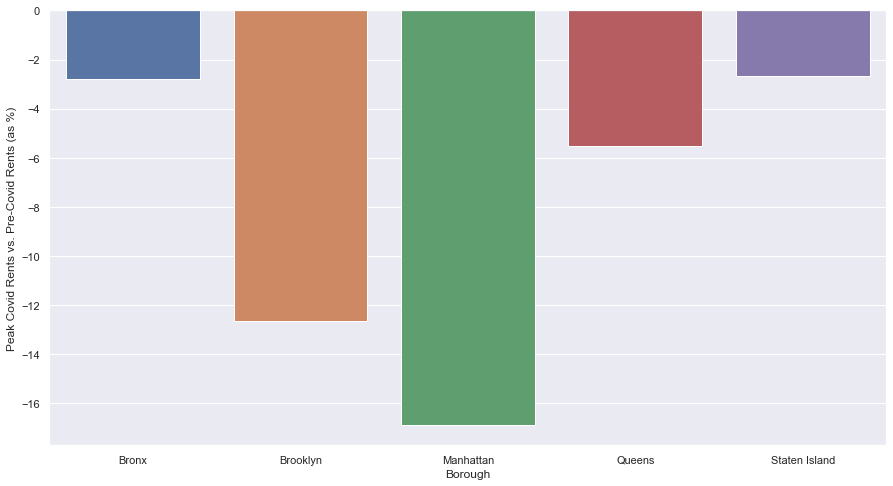

In [234]:
## Calculate the percent changes by borough of peak covid rates vs. pre covid rates 

changes = rents_over_time.pivot_table('Median_Rent', ['Borough'], 'covid_timeline').reset_index()
changes['Peak Covid Rents vs. Pre-Covid Rents (as %)'] = ((changes['Peak Covid']- changes['Pre-Covid'])/changes['Pre-Covid'])*100

sns.barplot(
    x = 'Borough',
    y = 'Peak Covid Rents vs. Pre-Covid Rents (as %)',
    data = changes
)

<AxesSubplot:xlabel='Borough', ylabel='Current Rents vs. Peak Covid Rents (as %)'>

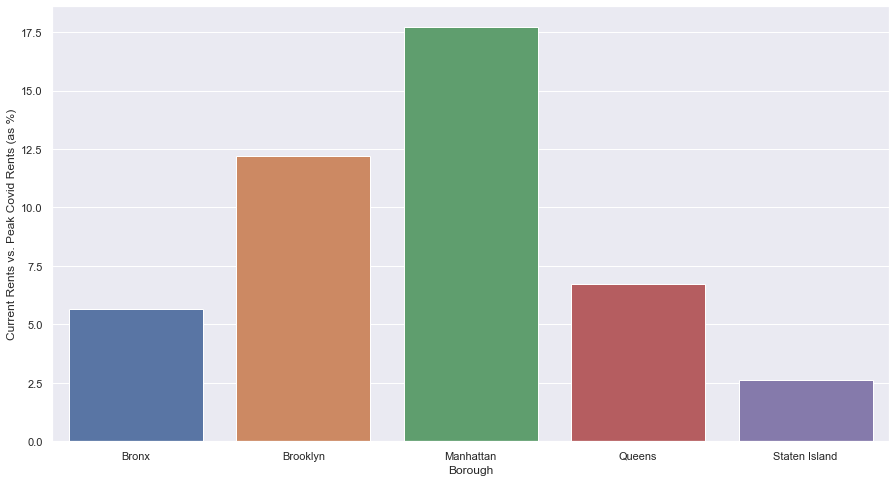

In [235]:
## Calculate the percent changes by borough of peak-covid rates vs current -- in order to see which is recovering well

changes2 = rents_over_time.pivot_table('Median_Rent', ['Borough'], 'covid_timeline').reset_index()
changes2['Current Rents vs. Peak Covid Rents (as %)'] = ((changes2['Current']- changes2['Peak Covid'])/changes2['Peak Covid'])*100

sns.barplot(
    x = 'Borough',
    y = 'Current Rents vs. Peak Covid Rents (as %)',
    data = changes2
)

<AxesSubplot:xlabel='Borough', ylabel='Current Rents vs. Pre-Covid Rents (as %)'>

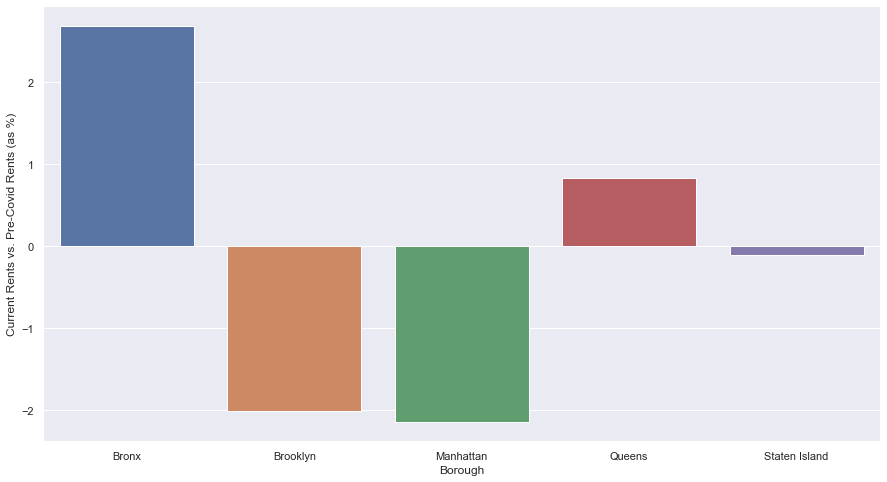

In [236]:
## Calculate the percent changes by borough of pre-covid rates vs current -- in order to see which is recovering well

changes3 = rents_over_time.pivot_table('Median_Rent', ['Borough'], 'covid_timeline').reset_index()
changes3['Current Rents vs. Pre-Covid Rents (as %)'] = ((changes3['Current']- changes3['Pre-Covid'])/changes3['Pre-Covid'])*100

sns.barplot(
    x = 'Borough',
    y = 'Current Rents vs. Pre-Covid Rents (as %)',
    data = changes3
)

In [237]:
changes.head()

covid_timeline,Borough,Covid Start,Current,Peak Covid,Pre-Covid,Peak Covid Rents vs. Pre-Covid Rents (as %)
0,Bronx,1894.500000,1938.360000,1834.571429,1887.625000,-2.810599
1,Brooklyn,2658.500000,2578.195652,2298.021277,2631.326087,-12.666800
2,Manhattan,3683.135135,3604.486486,3062.083333,3683.432432,-16.868752
3,Queens,2166.133333,2111.235294,1978.382353,2093.882353,-5.516069
4,Staten Island,2123.000000,1950.000000,1900.000000,1952.000000,-2.663934


,BOROUGH_GROUP,CONFIRMED_CASE_RATE,CASE_RATE,HOSPITALIZED_RATE,DEATH_RATE,CONFIRMED_CASE_COUNT,PROBABLE_CASE_COUNT,CASE_COUNT,HOSPITALIZED_COUNT,DEATH_COUNT
0,Bronx,11495.57,14040.69,1752.71,470.38,163031,36095,199126,24857,6671
1,Brooklyn,10035.42,12179.80,1373.29,417.13,256897,54894,311791,35155,10678
2,Manhattan,7595.66,9531.92,1010.25,282.13,123711,31536,155247,16454,4595
3,Queens,11019.64,13353.64,1547.04,448.39,248367,52605,300972,34868,10106
4,StatenIsland,14729.40,17662.97,1382.36,398.20,70133,13968,84101,6582,1896


In [257]:
changes.head()

covid_timeline,Borough,Covid Start,Current,Peak Covid,Pre-Covid,Peak Covid Rents vs. Pre-Covid Rents (as %)
0,Bronx,1894.500000,1938.360000,1834.571429,1887.625000,-2.810599
1,Brooklyn,2658.500000,2578.195652,2298.021277,2631.326087,-12.666800
2,Manhattan,3683.135135,3604.486486,3062.083333,3683.432432,-16.868752
3,Queens,2166.133333,2111.235294,1978.382353,2093.882353,-5.516069
4,Staten Island,2123.000000,1950.000000,1900.000000,1952.000000,-2.663934


<AxesSubplot:>

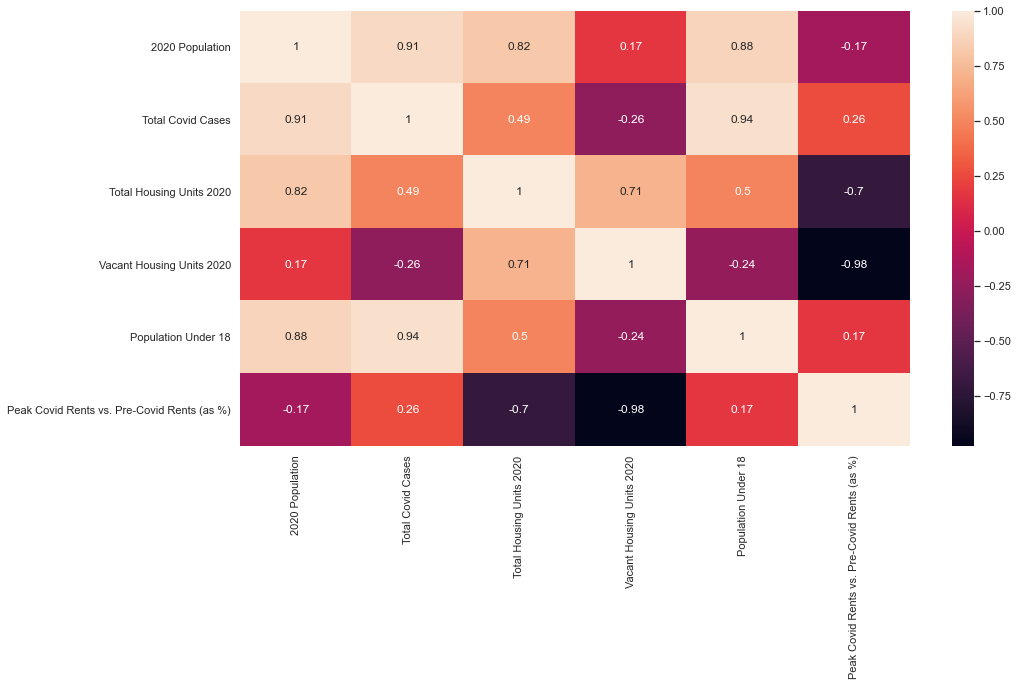

In [270]:
census_boros = census_data.loc[census_data['GeoType']== 'Boro']
census_analysis = census_boros[['Borough', 'Pop_20', 'HUnits_20' , 'VacHU_20',"PopU18_20"]]
census_analysis = census_analysis.merge(changes, left_on="Borough" , right_on="Borough")

cases_to_add = cases_by_boro[['BOROUGH_GROUP','CONFIRMED_CASE_COUNT']]
census_analysis = census_analysis.merge(cases_to_add, left_on="Borough" , right_on="BOROUGH_GROUP")

census_analysis.drop(columns= ['Covid Start' , "Current" , 'Peak Covid' , 'Pre-Covid'] , inplace=True)
census_analysis['Pop_20'] = census_analysis['Pop_20'].str.replace(',','').astype(int)
census_analysis['HUnits_20'] = census_analysis['HUnits_20'].str.replace(',','').astype(int)
census_analysis['VacHU_20'] = census_analysis['VacHU_20'].str.replace(',','').astype(int)
census_analysis['PopU18_20'] = census_analysis['PopU18_20'].str.replace(',','').astype(int)
census_analysis.rename(columns =  {  "Pop_20" : "2020 Population", 
                        "HUnits_20" : "Total Housing Units 2020" , 
                        "VacHU_20": "Vacant Housing Units 2020", 
                        "PopU18_20" : "Population Under 18", 
                        "CONFIRMED_CASE_COUNT" : "Total Covid Cases"}, inplace = True)
census_analysis.head()

corr_matrix = census_analysis[['2020 Population' ,"Total Covid Cases", 'Total Housing Units 2020','Vacant Housing Units 2020','Population Under 18' ,"Peak Covid Rents vs. Pre-Covid Rents (as %)"]].corr()
sns.heatmap(corr_matrix, annot = True)